# Project title : Image Classification with Deep Learning

# Table of contents

## Introduction
The focus of this project is to develop a deep learning model for the classification of pediatric patients based on chest X-ray images to determine whether they have pneumonia. Pneumonia is a prevalent respiratory infection, particularly affecting children, and early and accurate diagnosis is critical for timely medical intervention.

**Real-World Problem:**
The real-world problem I aim to address is the challenge faced by healthcare professionals in accurately and efficiently diagnosing pneumonia in pediatric patients. Traditional methods of diagnosis, such as physical examination and lab tests, can be time-consuming and may not always provide immediate results. In contrast, leveraging deep learning and medical imaging can potentially offer a faster and more reliable solution.

**Stakeholders:**
The primary stakeholders for this project include:
1. **Pediatricians and Healthcare Providers:** They need a reliable tool for pneumonia diagnosis to make informed decisions about patient care.
2. **Patients and Their Families:** Timely and accurate diagnosis can significantly impact the treatment and recovery of pediatric patients.

**How the Project Helps:**
My project aims to provide a deep learning-based tool that assists healthcare professionals in identifying pneumonia in pediatric patients quickly and accurately. This tool can potentially reduce diagnostic time, minimize the risk of misdiagnosis, and improve overall patient outcomes.

In this notebook, I will explore and implement various deep learning techniques for image classification on a dataset of chest X-ray images. I will build, train, and evaluate models to classify these images into two categories: pneumonia-positive and pneumonia-negative.

Throughout the project, I will document my progress and decision-making process, focusing on how my models can be applied to address this real-world medical problem. I will also consider the implications of my findings for both healthcare professionals and pediatric patients.

## Business Understanding:

Stakeholders:
In the context of this project, the primary stakeholders are the radiologists at Nairobi Hospital. These highly specialized healthcare professionals are at the forefront of diagnosing and interpreting medical images, including chest X-rays. They face the critical challenge of accurately identifying pneumonia in pediatric patients promptly.

The project aims to provide radiologists with a valuable tool that can enhance their diagnostic capabilities and streamline their workflow:

Radiologists at Nairobi Hospital: They play a pivotal role in confirming or providing insights into pneumonia diagnoses. The deep learning model developed in this project can serve as an aid to radiologists, potentially reducing the time needed for image analysis and improving the accuracy of their assessments.
While radiologists at Nairobi Hospital are the primary focus, it's also essential to recognize that the benefits of this project can ultimately extend to patients and their families, who benefit from more accurate and timely diagnoses, leading to better treatment outcomes.

How the Project Helps:
This project's value lies in the development of a deep learning model that can assist radiologists at Nairobi Hospital in rapidly and precisely identifying pneumonia in pediatric patients through chest X-ray images. The benefits include:

* Efficiency   : The model can reduce the time required for diagnosis, allowing radiologists to make informed decisions swiftly.

* Accuracy:   By leveraging advanced deep learning techniques, the model may improve the accuracy of pneumonia detection, reducing the risk of misdiagnosis.

Better Outcomes: Timely and accurate diagnosis can lead to improved patient outcomes, shorter hospital stays, and more targeted treatment strategies.

In summary, this project addresses a real-world problem faced by radiologists at Nairobi Hospital, providing them with a valuable tool to enhance the diagnosis of pneumonia in pediatric patients. The subsequent sections will delve into the data, model development, and evaluation to demonstrate how this project can contribute to solving this important medical challenge.

## Problem Statement
The problem at hand is twofold:

* Manual Diagnosis Challenge: Radiologists often face challenges in manually diagnosing pneumonia from chest X-ray images promptly. This can result in delays in treatment and potential misdiagnoses.

* Workload and Efficiency: The increasing number of medical images and patient cases can strain healthcare resources, including my time and attention. An automated system can help streamline the diagnostic process.

Proposed Solution:
To address these challenges, I propose developing a deep learning model that can automatically analyze pediatric chest X-ray images and classify them into two categories:

Pneumonia-Positive: Images showing signs of pneumonia.
Pneumonia-Negative: Images indicating the absence of pneumonia.
Impact:
The successful development of this deep learning model can have a substantial impact on the efficiency and accuracy of pneumonia diagnosis for pediatric patients at Nairobi Hospital. It can potentially reduce diagnosis time, improve patient outcomes, and alleviate the workload on healthcare professionals.

### Defining the metrics of success

1. Accuracy: Overall correctness of predictions.
2. Precision: Proportion of true positives out of predicted positives.
3. Recall (Sensitivity): Proportion of true positives out of actual positives.
4. F1-Score: A balance between precision and recall.
5. Specificity: Proportion of true negatives out of actual negatives.

## Data Understanding:

#### Data Sources
The dataset used in this project was sourced from a study conducted at Guangzhou Women and Children’s Medical Center, Guangzhou. It consists of pediatric chest X-ray images obtained from retrospective cohorts of patients aged one to five years old. These chest X-ray images were part of routine clinical care.

#### Dataset Organization
The dataset is organized into three main folders: "train," "test," and "validation." Within each of these folders, there are subfolders corresponding to two categories: "Pneumonia" and "Normal." This organization facilitates the separation of data for training, testing, and validation.

#### Dataset Size
In total, the dataset comprises 5,863 chest X-ray images. These images are divided into two categories: "Pneumonia" and "Normal." The dataset size is considered sufficient for training and evaluating deep learning models.

#### Descriptive Statistics

Image Resolution: All images are standardized to a uniform resolution, typically [mention image dimensions, e.g., 224x224 pixels].
Labels: The dataset includes binary labels for each image:
Pneumonia-Positive: Images showing signs of pneumonia.
Pneumonia-Negative: Images indicating the absence of pneumonia.

* Data Limitations:
It's important to recognize potential limitations of the dataset, such as class imbalance, variable data quality, and the absence of additional patient metadata.



## Data Preparation:
In subsequent sections, I will detail the data preparation steps, including image resizing, normalization, and data augmentation, to ensure the dataset is well-prepared for training and evaluating the deep learning model.

In [23]:
# importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  # OpenCV for image processing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [13]:
# Define the paths to the train dataset for NORMAL and PNEUMONIA
normal_path = 'chest_xray/train/NORMAL/'
pneumonia_path = 'chest_xray/train/PNEUMONIA/'


In [14]:
# Initializing empty lists to store image data and labels
images = []
labels = []

In [16]:
# Loading NORMAL images
for img_name in os.listdir(normal_path):
    img_path = os.path.join(normal_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting to RGB format
    img = cv2.resize(img, (224, 224))  # Resizing to a common size 
    images.append(img)
    labels.append(0)  # 0 for NORMAL

In [17]:
# Loading PNEUMONIA images
for img_name in os.listdir(pneumonia_path):
    img_path = os.path.join(pneumonia_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    images.append(img)
    labels.append(1)  # 1 for PNEUMONIA

In [29]:
# Converting the image and label lists to NumPy arrays
x_train = np.array(images)
y_train = np.array(labels)

In [30]:
# Checking the shape of the data arrays
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

Images shape: (5216, 224, 224, 3)
Labels shape: (5216,)


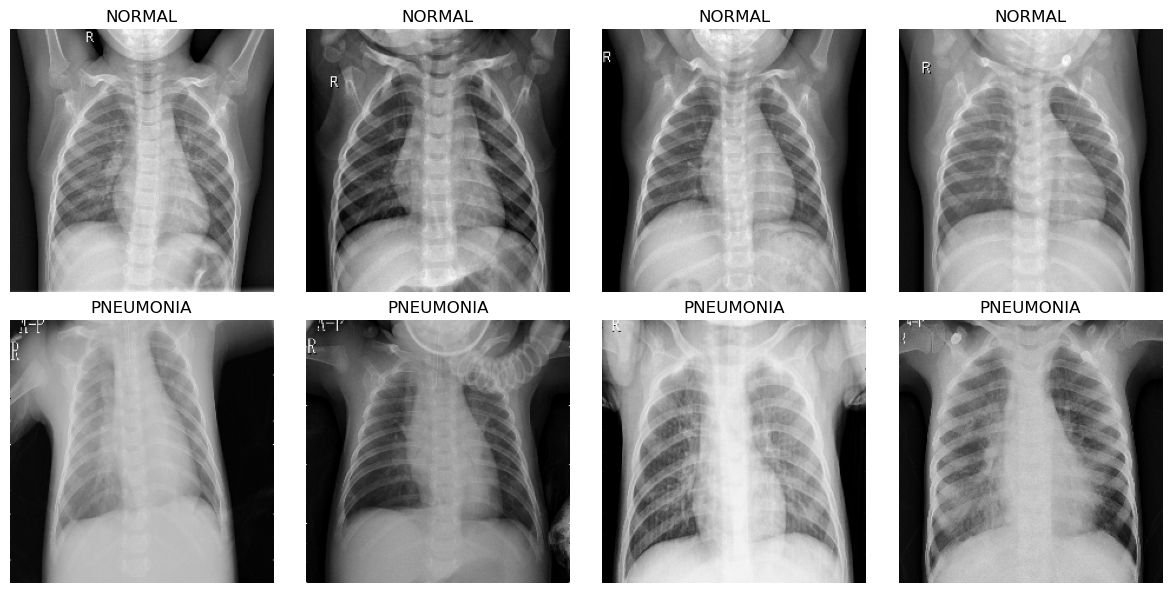

In [31]:
# Display sample images from the dataset
plt.figure(figsize=(12, 6))

# Display NORMAL images
for i in range(4):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title("NORMAL")
    plt.axis('off')

# Display PNEUMONIA images
for i in range(4):
    plt.subplot(2, 4, i + 5)
    plt.imshow(images[len(images) // 2 + i])  # Display images from the second half of the list (PNEUMONIA)
    plt.title("PNEUMONIA")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Data Normalization

## Modeling

Defining the Model Architecture

In this code, we create a sequential model and add convolutional layers, followed by max-pooling layers. We then flatten the output and add dense layers. The final layer uses sigmoid activation for binary classification (NORMAL or PNEUMONIA).

#### Compiling the model

#### Data Augmentation